# Taxonomy Classification Model (Label Spreading)

## Import Notebook

In [1]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-09-28 00:52:06.283916: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## ASRS Data Source

AutoLabeling sample_size= (10000, 6)
finding_factor


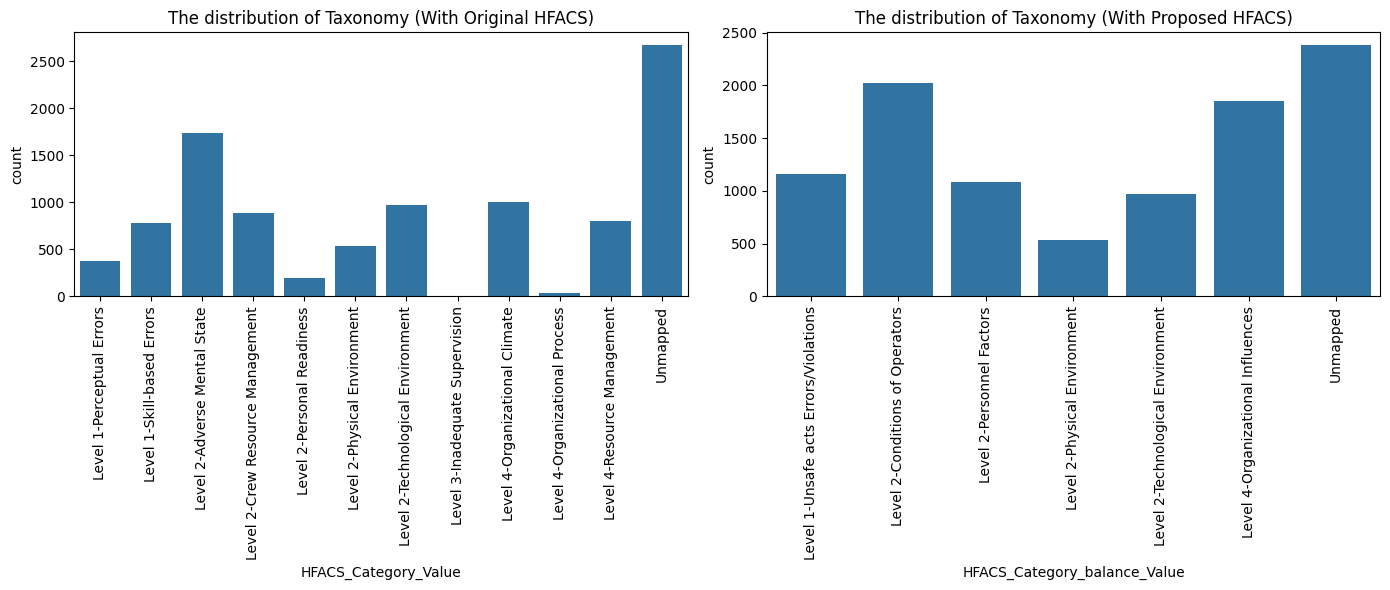

Shape of label tensor: (10000,)
Accuracy on test data: 0.9770341207349081


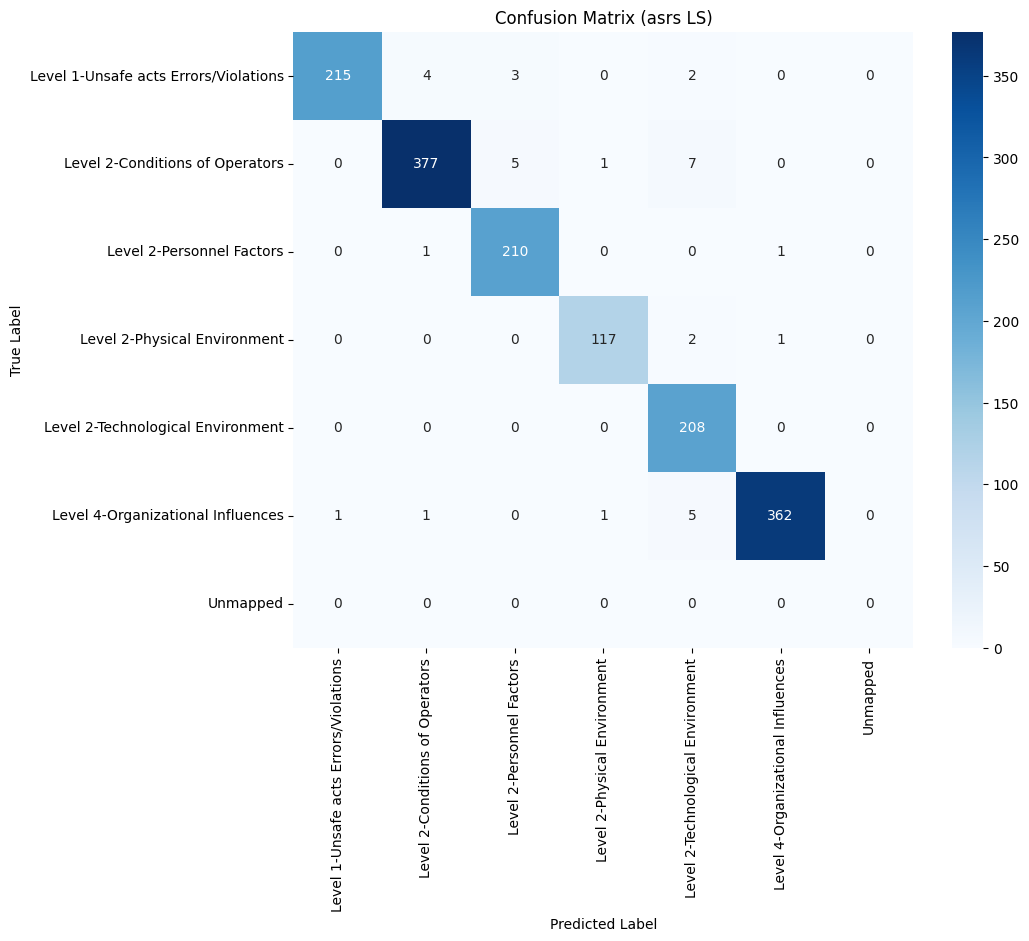

asrs Model and vectorizer saved successfully


In [6]:
options={ "is_merge_taxonomy": True }

# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2000, to_year=2023)

# 02. Label Spreading
asrs_modelLS = ModelLS({'asrs': asrs_df}, 'asrs', 10000, options=options)
asrs_modelLS.train()

## NTSB Dats Source

AutoLabeling sample_size= (10000, 6)
finding_factor


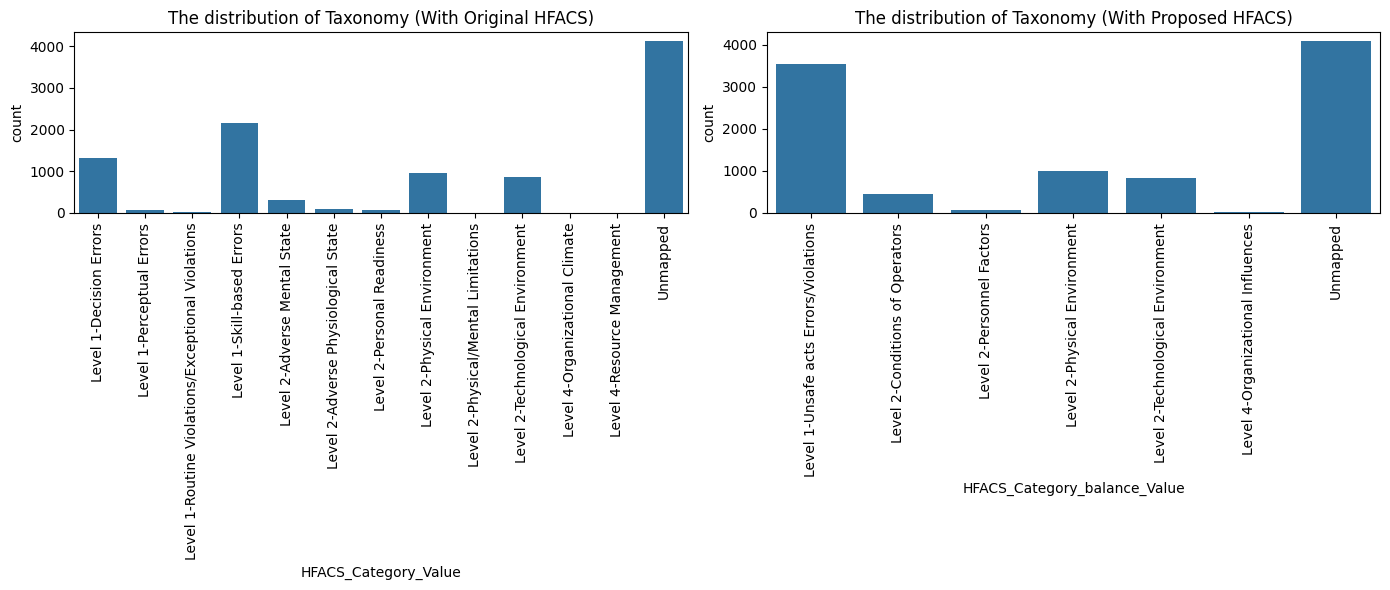

Shape of label tensor: (10000,)
Accuracy on test data: 1.0


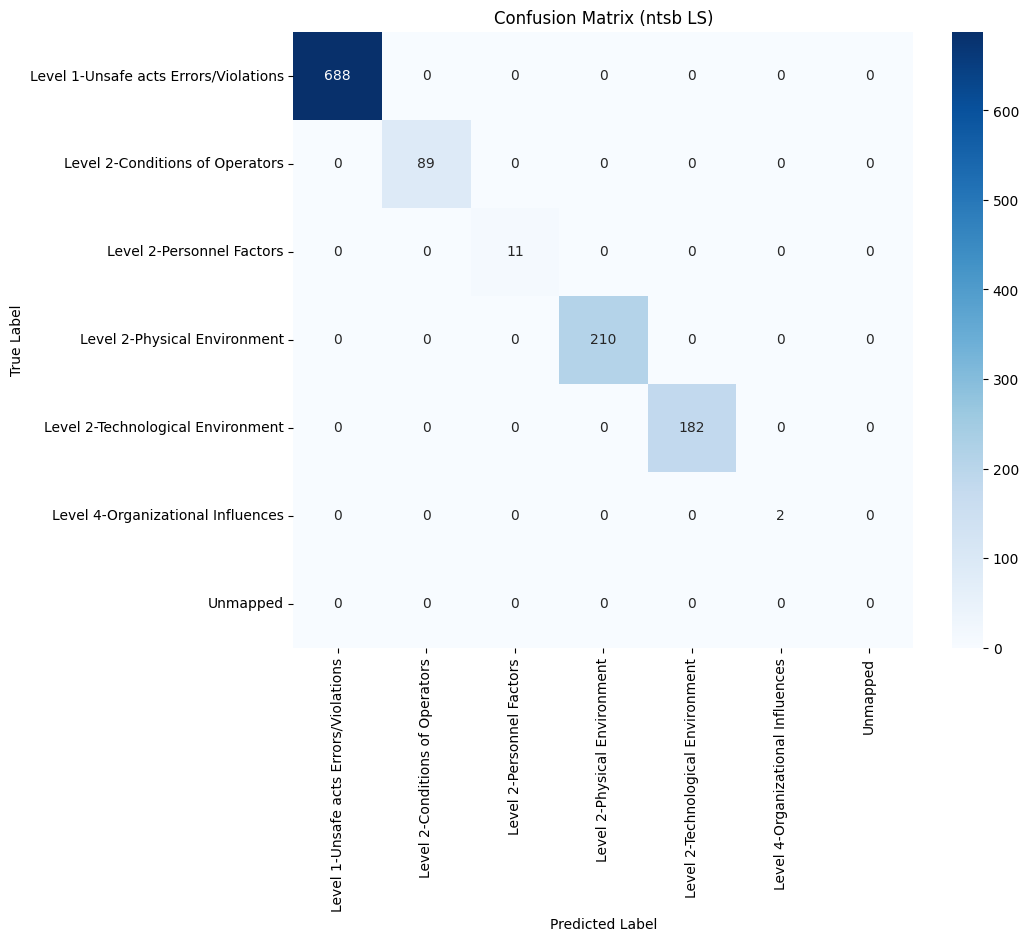

ntsb Model and vectorizer saved successfully


In [7]:
options={ "is_merge_taxonomy": True }
# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb', from_year=2000, to_year=2023)

ntsb_modelLS = ModelLS({'ntsb': ntsb_df}, 'ntsb', 10000, options=options)
ntsb_modelLS.train()

## ASRS + NTSB 

AutoLabeling sample_size= (10000, 6)
finding_factor


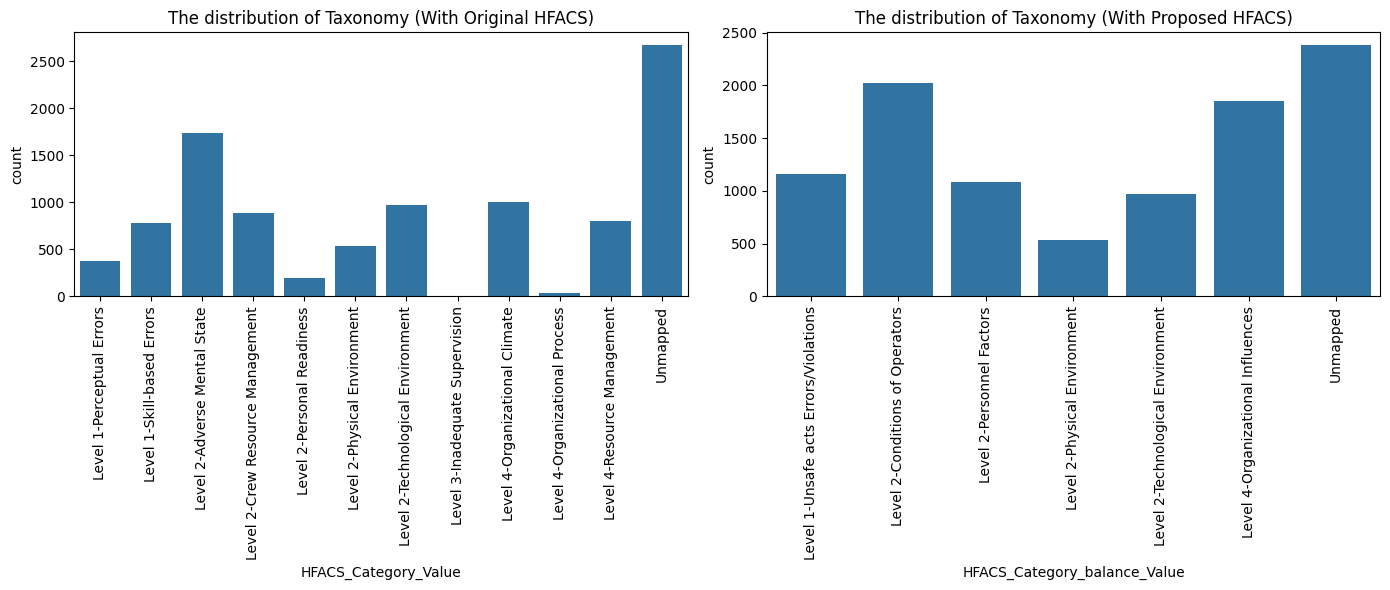

AutoLabeling sample_size= (10000, 6)
finding_factor


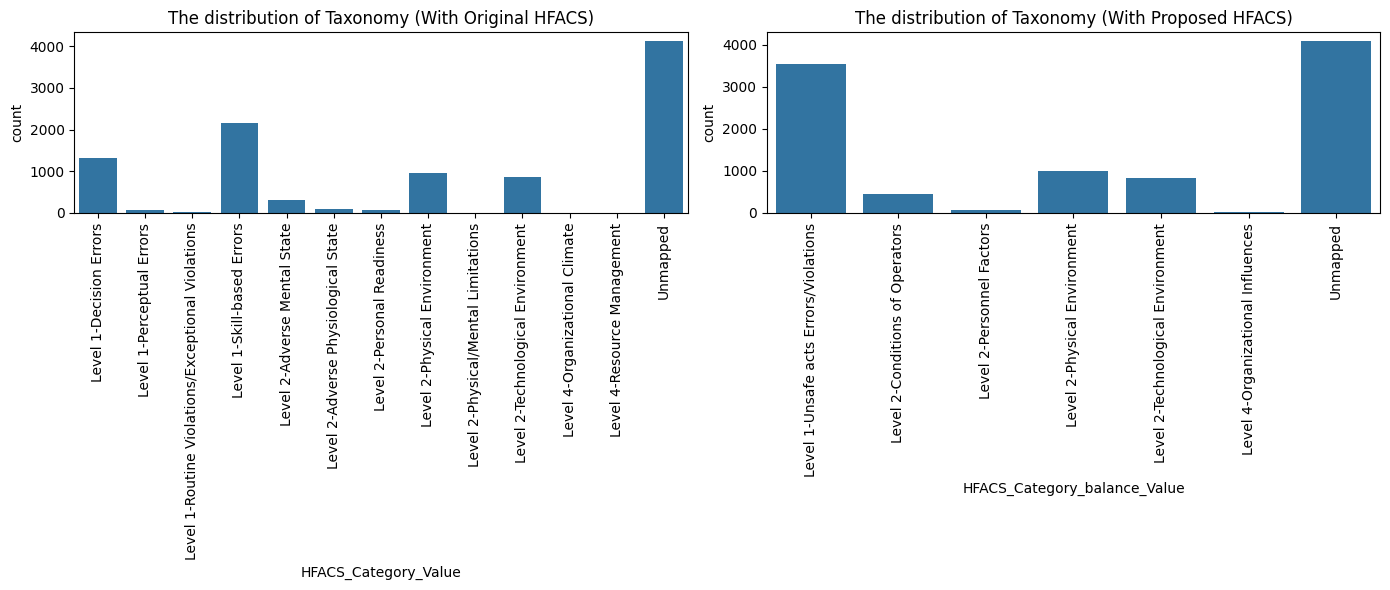

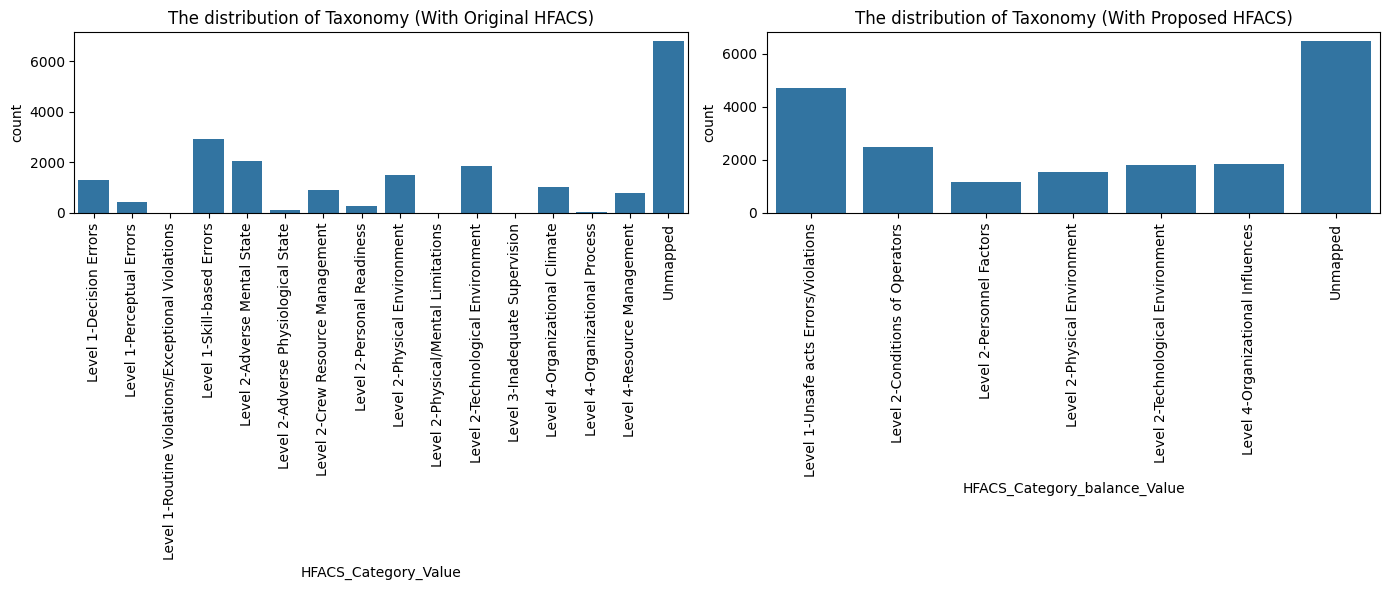

Shape of label tensor: (20000,)
Accuracy on test data: 0.9900184842883549


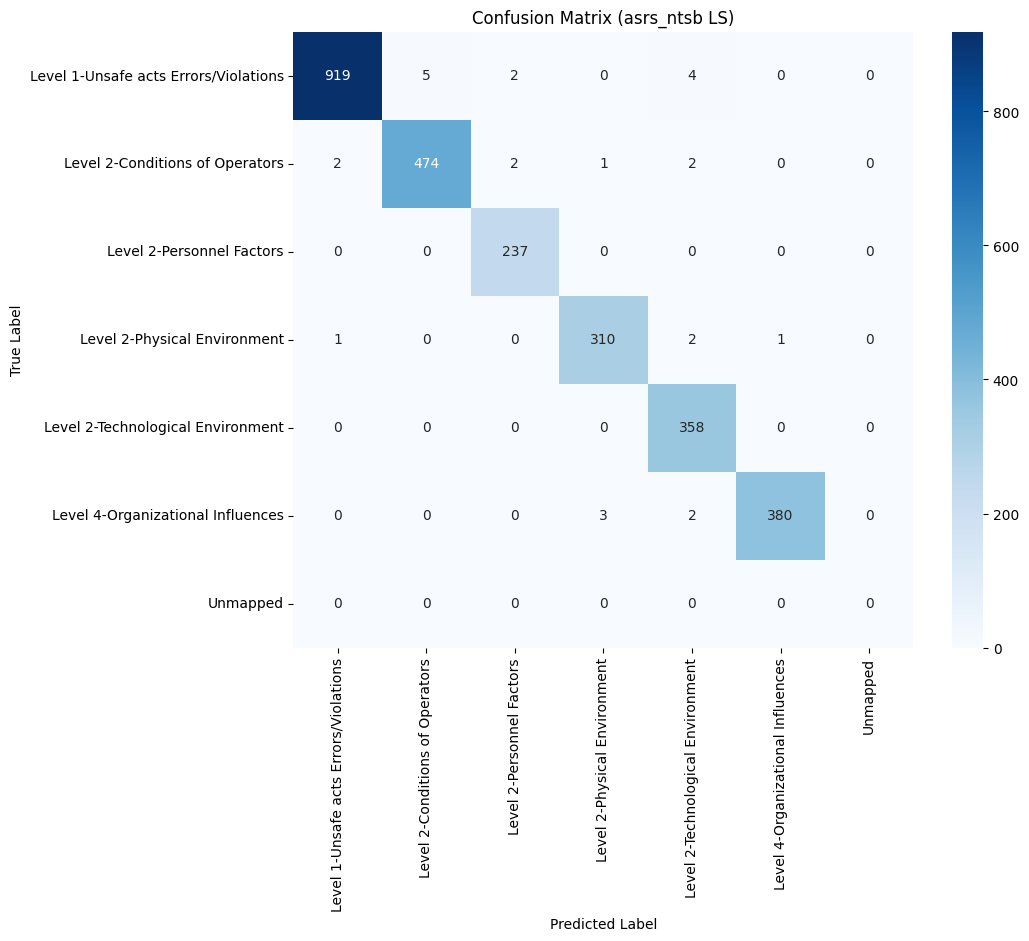

asrs_ntsb Model and vectorizer saved successfully


In [8]:
options={ "is_merge_taxonomy": True }
# 01. Manual Labeling with specific sample
asrs_df = CoreUtils.get_data('asrs', from_year=2000, to_year=2023)

ntsb_df = CoreUtils.get_data('ntsb', from_year=2000, to_year=2023)

asrs_ntsb_modelLS = ModelLS({'asrs': asrs_df, 'ntsb': ntsb_df}, 'asrs_ntsb', 10000, options=options)
asrs_ntsb_modelLS.train()